<a href="https://colab.research.google.com/github/girishn7/ML-Learning/blob/main/EDA_Titanic_Survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy matplotlib seaborn missingno


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [6]:
df=pd.read_csv("train.csv")

Exploring the Data

In [8]:
print("Shape:", df.shape)
print("\nColumns:", df.columns)
df.info()
print("\nSummary Statistics:\n")
print(df.describe(include='all'))

Shape: (891, 12)

Columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Summary Statistics:

        PassengerId    Survived      Pclas

visualizing Missing values


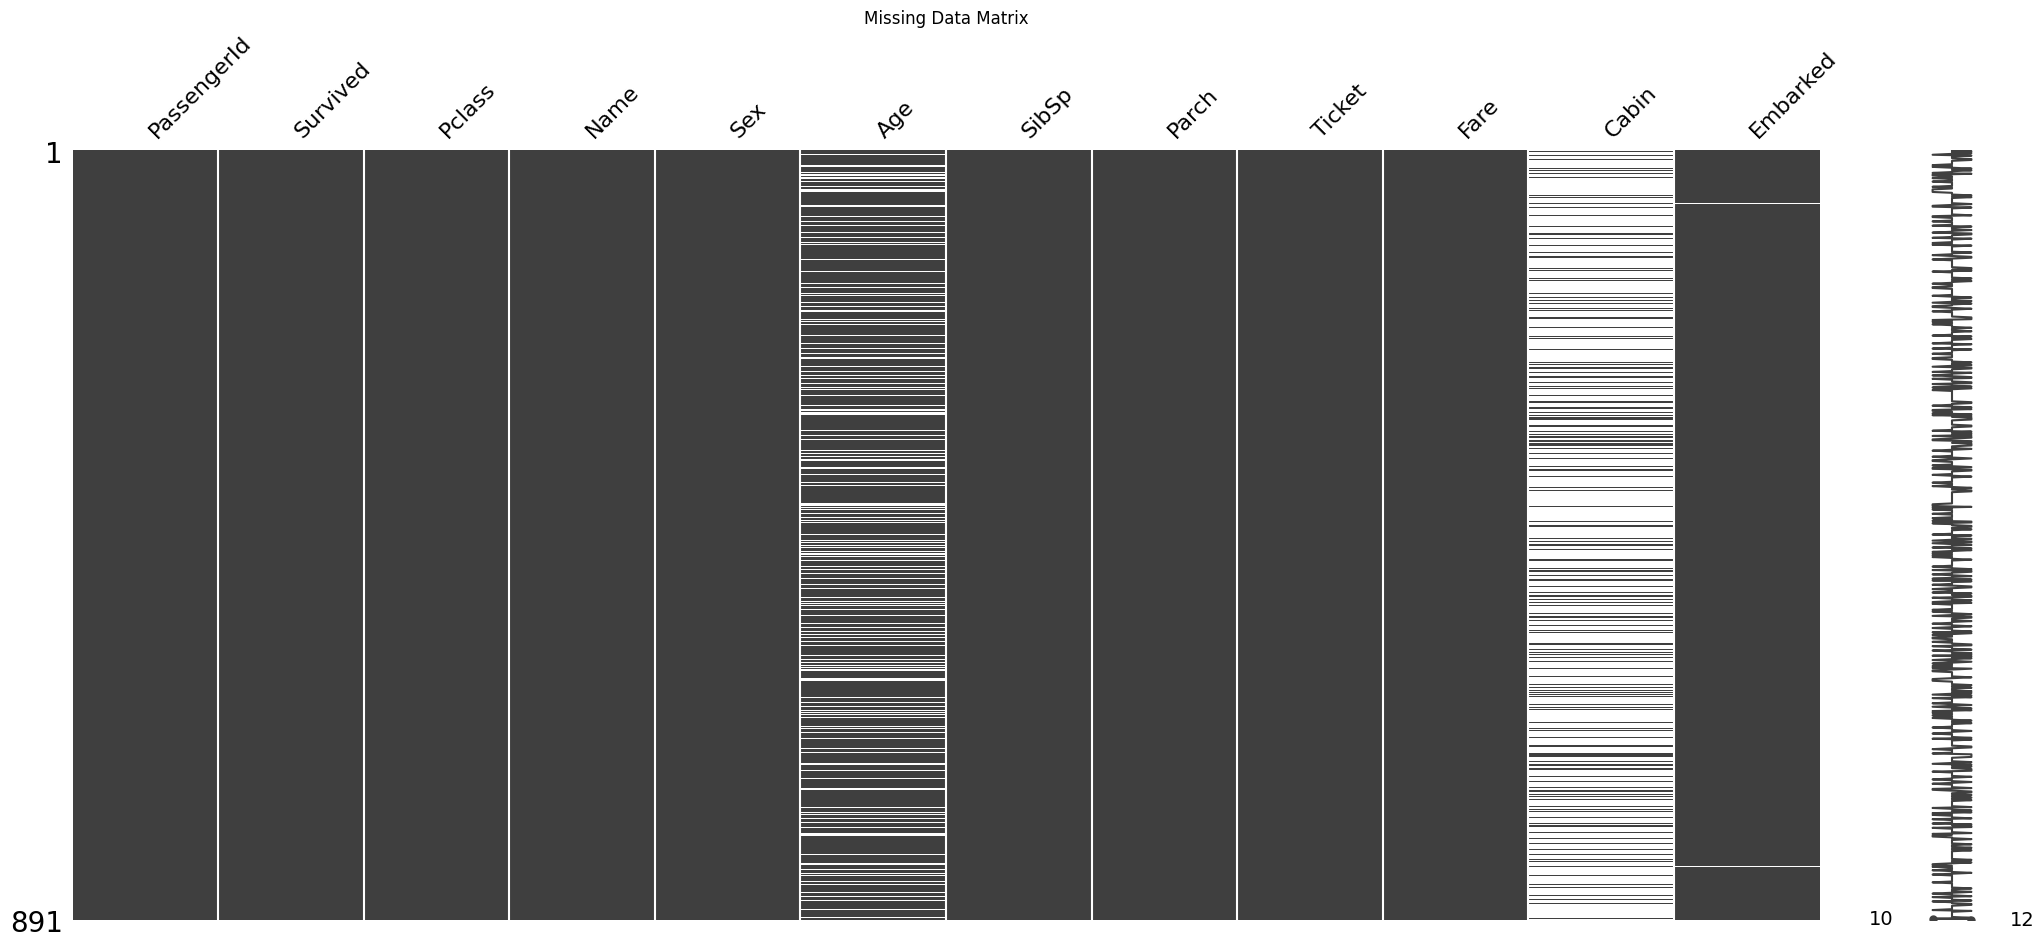

In [9]:
msno.matrix(df)
plt.title("Missing Data Matrix")
plt.show()

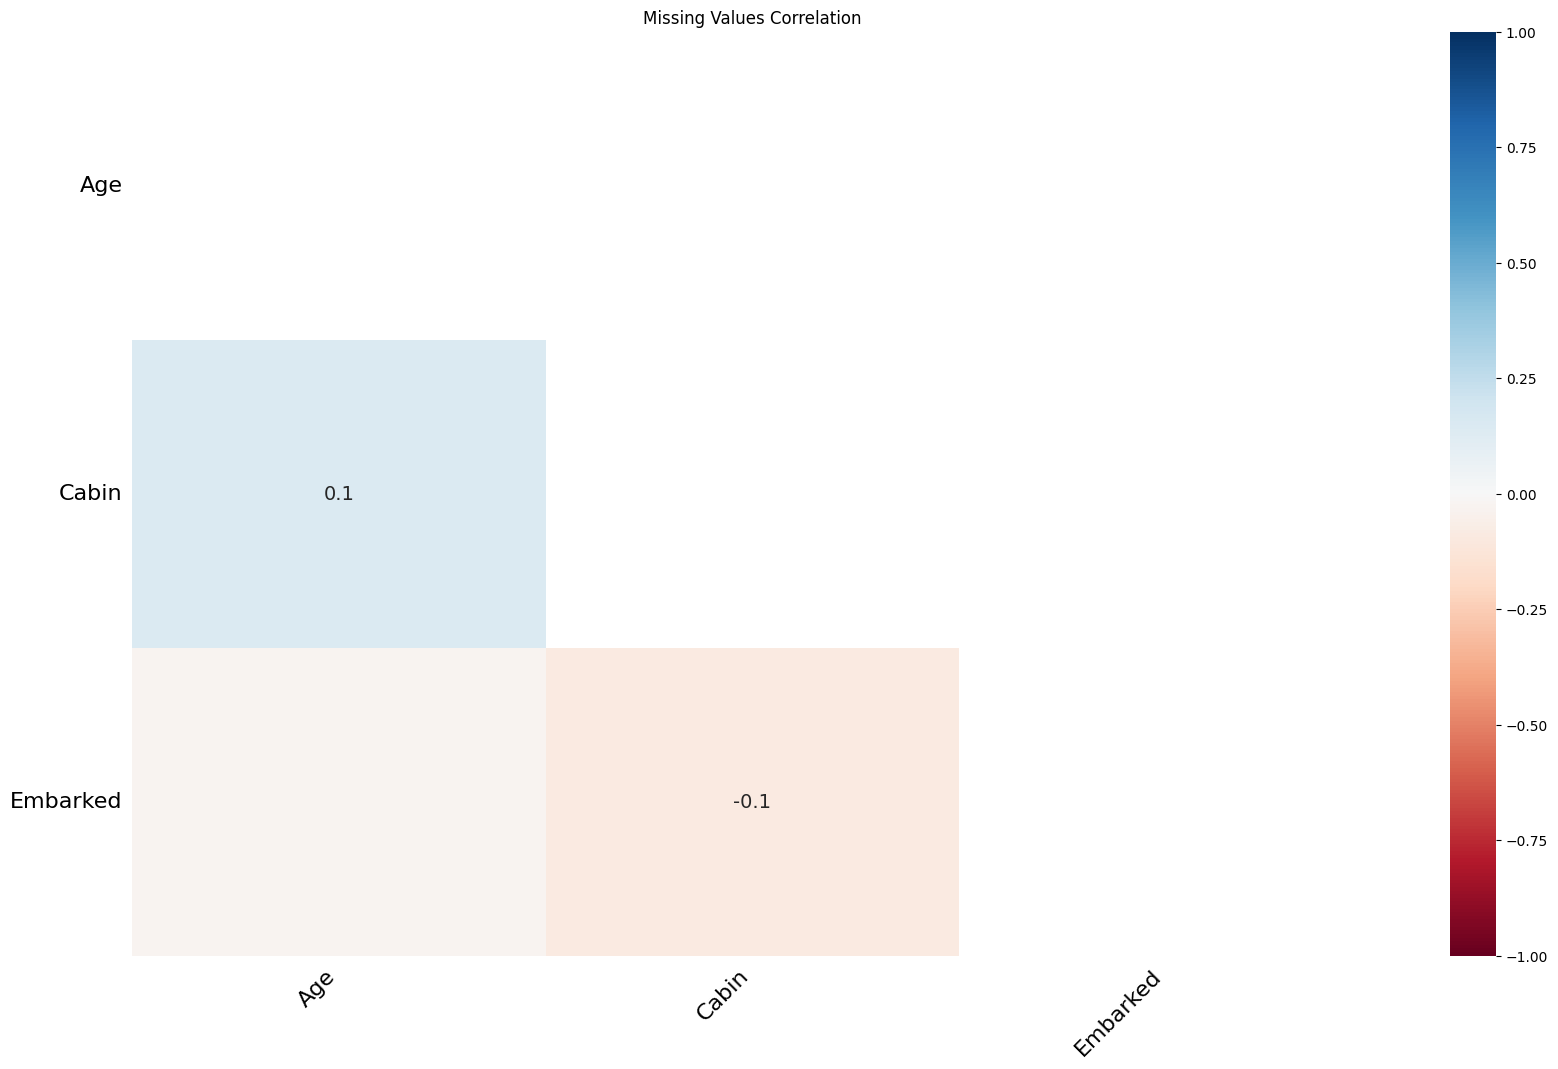

In [10]:
msno.heatmap(df)
plt.title("Missing Values Correlation")
plt.show()

In [11]:
print("Missing values:\n", df.isnull().sum())


Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,Mr


Univariate Analysis

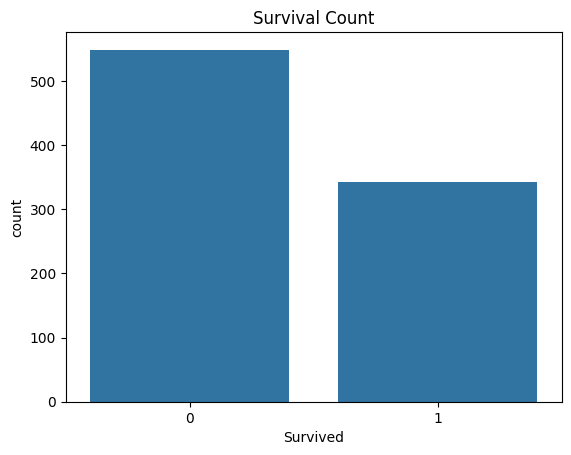

In [12]:
sns.countplot(x="Survived", data=df)
plt.title("Survival Count")
plt.show()

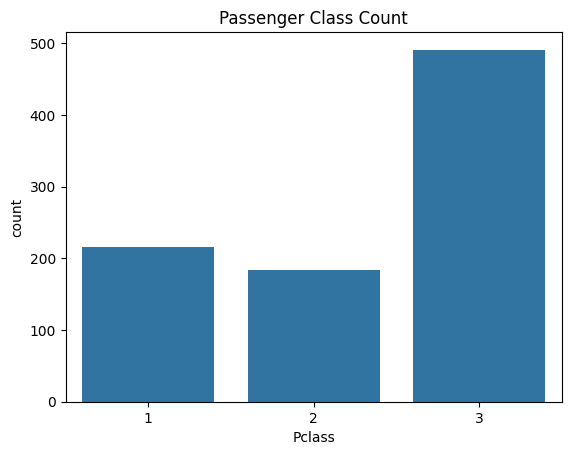

In [13]:
sns.countplot(x='Pclass', data=df)
plt.title("Passenger Class Count")
plt.show()

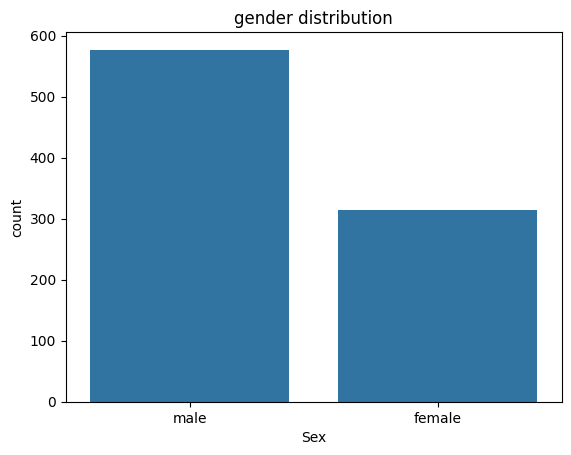

In [15]:
sns.countplot(x="Sex", data=df)
plt.title("gender distribution")
plt.show()

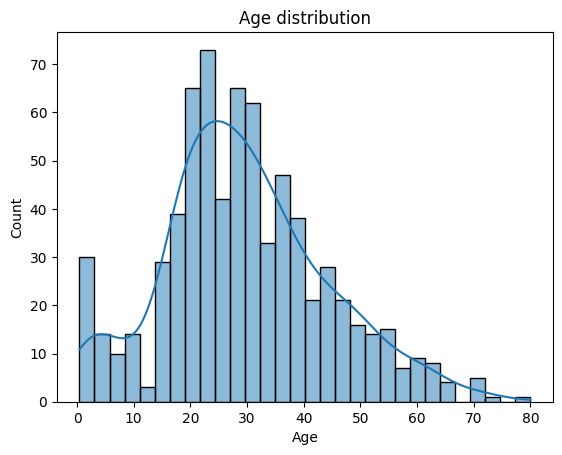

In [16]:
sns.histplot(df["Age"].dropna(), kde=True, bins=30)
plt.title("Age distribution")
plt.show()

Bivariate Analysis

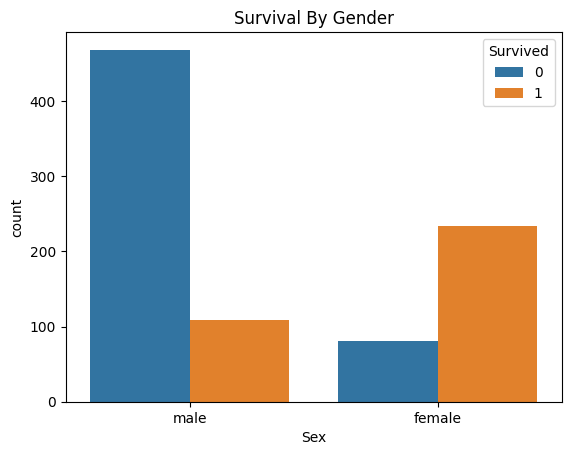

In [18]:
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival By Gender")
plt.show()

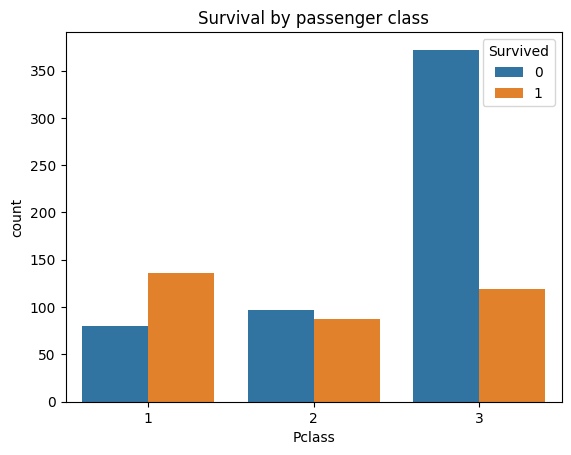

In [19]:
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survival by passenger class")
plt.show()

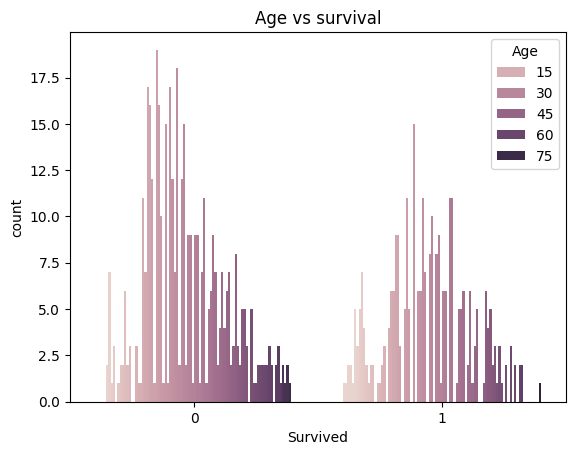

In [23]:
sns.countplot(x="Survived", hue="Age", data=df)
plt.title("Age vs survival")
plt.show()

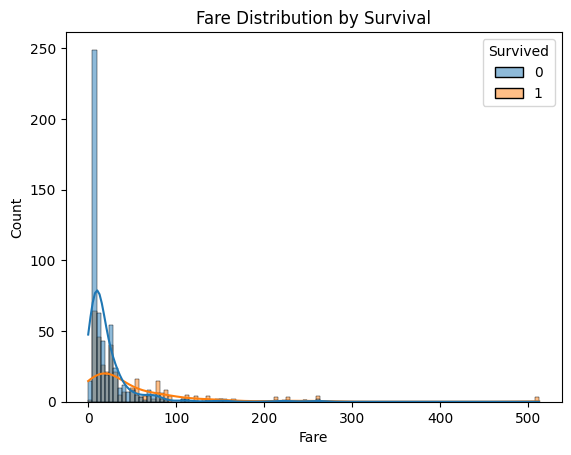

In [24]:
sns.histplot(data=df, x="Fare", hue="Survived", kde=True)
plt.title("Fare Distribution by Survival")
plt.show()


Feature Engineering

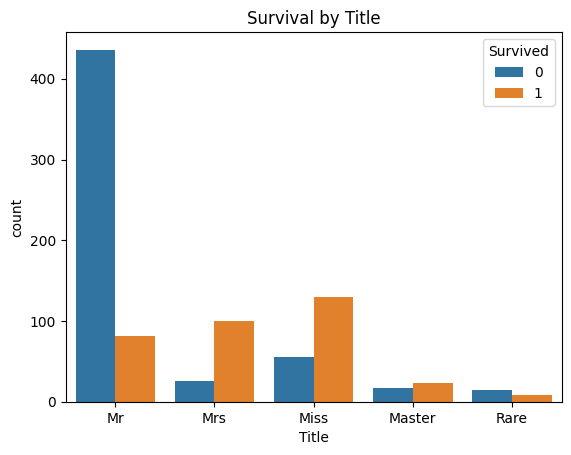

In [25]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

df["IsAlone"] = (df["FamilySize"] == 1).astype(int)

df["Title"] = df["Name"].str.extract(" ([A-Za-z]+)\.", expand=False)

df["Title"] = df["Title"].replace(['Lady', 'Countess', 'Capt', 'Col',
                                   'Don', 'Dr', 'Major', 'Rev', 'Sir',
                                   'Jonkheer', 'Dona'], 'Rare')
df["Title"] = df["Title"].replace('Mlle', 'Miss')
df["Title"] = df["Title"].replace('Ms', 'Miss')
df["Title"] = df["Title"].replace('Mme', 'Mrs')

sns.countplot(x="Title", hue="Survived", data=df)
plt.title("Survival by Title")
plt.show()


Correlation Heatmap

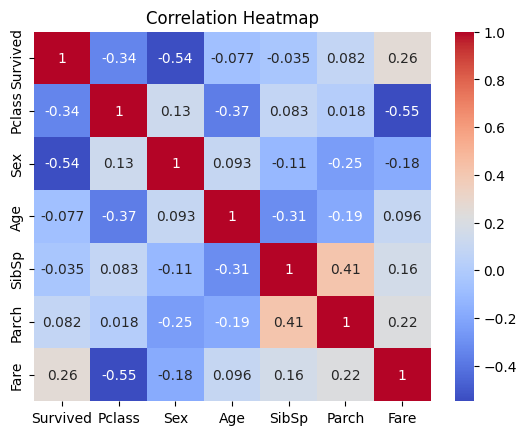

In [26]:
df_corr = df[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]].copy()
df_corr["Sex"] = df_corr["Sex"].map({"male": 1, "female": 0})

sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
